Welcome to the NLP Exercise

In [1]:
!git clone https://github.com/nlpexercise/nlp_exercise.git

Cloning into 'nlp_exercise'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 12 (delta 4), reused 12 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 29.81 MiB | 19.33 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
# Run this cell to unzip the data directory into your Colab environment
!unzip nlp_exercise/data.zip

Archive:  nlp_exercise/data.zip
   creating: data/
  inflating: __MACOSX/._data         
   creating: data/docs/
  inflating: __MACOSX/data/._docs    
   creating: data/meta_data/
  inflating: __MACOSX/data/._meta_data  
  inflating: data/docs/docs_5.txt    
  inflating: __MACOSX/data/docs/._docs_5.txt  
  inflating: data/docs/docs_4.txt    
  inflating: __MACOSX/data/docs/._docs_4.txt  
  inflating: data/docs/docs_6.txt    
  inflating: __MACOSX/data/docs/._docs_6.txt  
  inflating: data/docs/docs_7.txt    
  inflating: __MACOSX/data/docs/._docs_7.txt  
  inflating: data/docs/docs_3.txt    
  inflating: __MACOSX/data/docs/._docs_3.txt  
  inflating: data/docs/docs_2.txt    
  inflating: __MACOSX/data/docs/._docs_2.txt  
  inflating: data/docs/docs_0.txt    
  inflating: __MACOSX/data/docs/._docs_0.txt  
  inflating: data/docs/docs_1.txt    
  inflating: __MACOSX/data/docs/._docs_1.txt  
  inflating: data/meta_data/docs_6.csv  
  inflating: __MACOSX/data/meta_data/._docs_6.csv  
  infl

In [3]:
#packages
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#importing the data___
doc_0= pd.read_csv('/content/data/docs/docs_0.txt', sep= '\t', header= None)
doc_1= pd.read_csv('/content/data/docs/docs_1.txt', sep= '\t', header= None)
doc_2= pd.read_csv('/content/data/docs/docs_2.txt', sep= '\t', header= None)
doc_3= pd.read_csv('/content/data/docs/docs_3.txt', sep= '\t', header= None)
doc_4= pd.read_csv('/content/data/docs/docs_4.txt', sep= '\t', header= None)
doc_5= pd.read_csv('/content/data/docs/docs_5.txt', sep= '\t', header= None)


In [ ]:
# Combining dataset__
text_train_set=pd.concat([doc_0, doc_1,doc_2,doc_3,doc_4,doc_5])
text_train_set.rename( columns={0 :'Id',1: 'text'}, inplace=True )
text_train_set.drop(index=text_train_set.index[0], axis=0, inplace=True)
text_train_set

,Id,text
1,0.0,Current Music: Could It Be Magic - Do...
2,1.0,Hey. This one of the many things I have...
3,2.0,Much funny. 2 points. As mentioned in the...
4,3.0,"Harpers, Harpers, everywhere. Harpers, Har..."
5,4.0,"In an earlier post, Johnathan said: 'And ..."
...,...,...
13204,62520.0,"Dammit, I have been invaded by pi..."
13205,62521.0,"I have been reading (ok, more lik..."
13206,62522.0,I hate any kind of scented shampo...
13207,62523.0,I saw the urlLink Bourne Suprema...


In [ ]:
#Importing meta data to get the topic- y values and removing columns that we donot require in later steps
doc0_topic= pd.read_csv('/content/data/meta_data/docs_0.csv')
doc1_topic= pd.read_csv('/content/data/meta_data/docs_1.csv')
doc2_topic= pd.read_csv('/content/data/meta_data/docs_2.csv')
doc3_topic= pd.read_csv('/content/data/meta_data/docs_3.csv')
doc4_topic= pd.read_csv('/content/data/meta_data/docs_4.csv')
doc5_topic= pd.read_csv('/content/data/meta_data/docs_5.csv')
doc0_topic=doc0_topic.drop(['gender','age','sign', 'date'], axis=1)
doc1_topic=doc1_topic.drop(['gender','age','sign', 'date'], axis=1)
doc2_topic=doc2_topic.drop(['gender','age','sign', 'date'], axis=1)
doc3_topic=doc3_topic.drop(['gender','age','sign', 'date'], axis=1)
doc4_topic=doc4_topic.drop(['gender','age','sign', 'date'], axis=1)
doc5_topic=doc5_topic.drop(['gender','age','sign', 'date'], axis=1)
topic_train_set=pd.concat([doc0_topic, doc1_topic,doc2_topic,doc3_topic,doc4_topic,doc5_topic])
topic_train_set.rename( columns={'Unnamed: 0':'Id'}, inplace=True )
topic_train_set

,Id,topic
0,0,Arts
1,1,Arts
2,2,Technology
3,3,Technology
4,4,Technology
...,...,...
13203,62520,Technology
13204,62521,Technology
13205,62522,Technology
13206,62523,Technology


In [ ]:
#Merging topic and text together
df=pd.merge(text_train_set, topic_train_set, on='Id')
df=df.drop(['Id'], axis=1)
df

,text,topic
0,Current Music: Could It Be Magic - Do...,Arts
1,Hey. This one of the many things I have...,Arts
2,Much funny. 2 points. As mentioned in the...,Technology
3,"Harpers, Harpers, everywhere. Harpers, Har...",Technology
4,"In an earlier post, Johnathan said: 'And ...",Technology
...,...,...
62520,"Dammit, I have been invaded by pi...",Technology
62521,"I have been reading (ok, more lik...",Technology
62522,I hate any kind of scented shampo...,Technology
62523,I saw the urlLink Bourne Suprema...,Technology


In [ ]:
#Checking whether the target data are imbalanced or balanced?
display(df.topic.unique())
display(df.shape) # Number of rows (instances) and columns in the dataset 62525, 2)
df["topic"].value_counts()/df.shape[0]

array(['Arts', 'Technology'], dtype=object)

(62525, 2)

Technology    0.557377
Arts          0.442623
Name: topic, dtype: float64

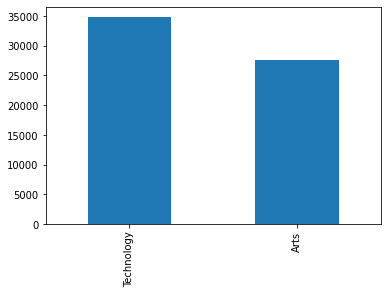

In [ ]:
df["topic"].value_counts().plot.bar()

In [ ]:
# convert label to a numerical variable
df['topic'] = df.topic.map({'Arts':1, 'Technology':0})
display(df)
df.shape

,text,topic
0,Current Music: Could It Be Magic - Do...,1
1,Hey. This one of the many things I have...,1
2,Much funny. 2 points. As mentioned in the...,0
3,"Harpers, Harpers, everywhere. Harpers, Har...",0
4,"In an earlier post, Johnathan said: 'And ...",0
...,...,...
62520,"Dammit, I have been invaded by pi...",0
62521,"I have been reading (ok, more lik...",0
62522,I hate any kind of scented shampo...,0
62523,I saw the urlLink Bourne Suprema...,0


(62525, 2)

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [ ]:
tech= df[df['topic'].isin([0])]
tech_str= tech.text.str.cat()
arts= df[df['topic'].isin([1])]
arts_str= arts.text.str.cat()


WordCloud in Technology____

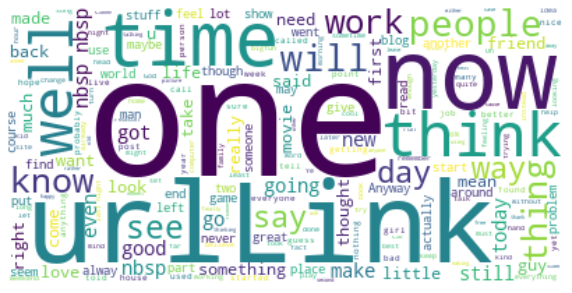

In [ ]:
wordcloud_tech= WordCloud(background_color='white').generate(tech_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_tech,interpolation='bilinear')
plt.axis("off")
plt.show()

WordCloud in Arts________

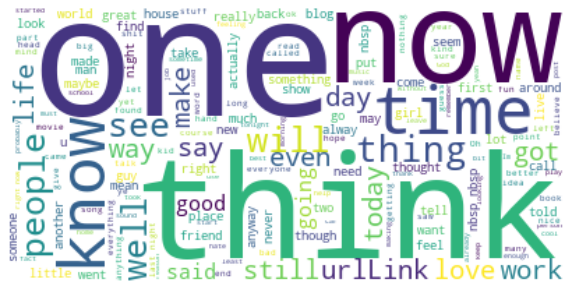

In [ ]:
wordcloud_arts= WordCloud(background_color='white').generate(arts_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_arts,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Detect all Non-English rows
def isEnglish(s):
    try:
        s.encode().decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True
df_NonEng_detect = df.text.apply(lambda x: isEnglish(x))
df = df[df_NonEng_detect]
df.shape #reduced to (59482, 2) from original sample of (62525, 2)

(59482, 2)

In [ ]:
#Creating copy of df and storing in messages to use the messages variable further
messages= df.copy()
messages.reset_index(inplace=True)
messages.tail(100)

,index,text,topic
59382,62419,roy is leaving today. we had a product...,1
59383,62420,ever been at a time in your life where ...,1
59384,62421,i have a job interview job with penguin...,1
59385,62422,,1
59386,62423,my comments don't work.. i'm trying to ...,1
...,...,...,...
59477,62519,I am trying to be nicer to everyo...,0
59478,62520,"Dammit, I have been invaded by pi...",0
59479,62521,"I have been reading (ok, more lik...",0
59480,62522,I hate any kind of scented shampo...,0


In [ ]:
#Using stopwords and lemmatizer function ready to apply in the text data
stop_words = set(stopwords.words("english"))
get_lemma = WordNetLemmatizer()


In [ ]:
#Creating a for loop to do reg ex, lemmatization, splliting words and use stop words
corpus=[]
for i in range(0, len(messages)):
  text = re.sub(r'[^a-zA-Z]',' ',messages['text'][i]) #go to each lines  and substitute all the character except with lowercase a to z except by whitespace
  text = text.lower()
  text = [get_lemma.lemmatize(token) for token in text.split(" ")]
  text = [get_lemma.lemmatize(token, "v") for token in text]    #verb / noun
  text = [word for word in text if not word in stop_words] # here all the lemma words which are if stopwords like a an then remove else put it
  text = " ".join(text)
  corpus.append(text)


In [ ]:
corpus[0:5]

['        current music   could magic   donna summer  feel   blah  ok  late  yeah post since diary suchisthis  server  bitch  vicky head kristen house bronx bbq  live far matter b c spend night wa worth  vicky eat lot chicken hot dog   kill  donut  wa great  fullfilling   lol  soon hour go go outside  kristen neighbor light firework middle street  wa cool pretty first start swift position  go air go look like wa go hit u  scream run around corner  many come one another  think purpose enjoy scream terrorize  kristen wa blast laugh u  wa stand like wa tomorrow  hmm   let get burn  lol  block  later night ritual  burn ritual  lol  vicky kristen burn everything plastic cup pop rock  haha  wa great  think kristen ha slight fetish hot wax  keep pour candle outside  wa like wrong   know hot  wa like really burn  feel good  try   pour    let ahh        really worry  wa feel little darish tell flash air  show thier bra  pussy say  like well u anything yet  let see   flash air feminine part form

In [ ]:
#Adding more packages____
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as sk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
df_test = pd.DataFrame (corpus, columns = ['text'])
X_df_test= df_test['text']
y=messages['topic']

In [ ]:
#Spliting to train and test sets by 80 20 ratio___
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df_test,y,test_size= 0.20, random_state=0)

In [ ]:
#Pipeline to select the best number of features
pipeline_countvectorizerMN_3000 = Pipeline([('vect', CountVectorizer(max_features=3000)),
                      ('clf', MultinomialNB())])
pipeline_countvectorizerMN_1000=Pipeline([('vect',CountVectorizer(max_features=1000, ngram_range=(1,3))),
                       ('clf', MultinomialNB())])
pipeline_TFidfMN_3000=Pipeline([('vect',TfidfVectorizer(max_features=3000,ngram_range=(1,3))),
                       ('clf', MultinomialNB())])
pipeline_TFidflogistic_4000=Pipeline([('vect',TfidfVectorizer(max_features=4000,ngram_range=(1,3))),
                      ('clf', LogisticRegression())])
pipeline_randomForest_tfidf_4000= Pipeline([('vect',TfidfVectorizer(max_features=4000,ngram_range=(1,3))),
                       ('clf',OneVsRestClassifier(RandomForestClassifier(n_estimators=50),n_jobs=-1))])



In [ ]:
## Making the list of pipelines________________
pipelines = [pipeline_countvectorizerMN_3000 , pipeline_countvectorizerMN_1000, pipeline_TFidfMN_3000, pipeline_TFidflogistic_4000 ,pipeline_randomForest_tfidf_4000]

In [ ]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [ ]:

pipe_dict = {0: 'MultinomialNB countvectorizer with 3000', 1: 'MultinomialNB countvectorizer with 1000',2: 'MultinomialNB TF-IDF with 3000',3: 'Logistic tfidf with 4000', 4: 'Random Forest tfidf with 4000'}

In [ ]:
# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Accuracy score of each models
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

MultinomialNB countvectorizer with 3000 Test Accuracy: 0.6780701017063125
MultinomialNB countvectorizer with 1000 Test Accuracy: 0.6382281247373287
MultinomialNB TF-IDF with 3000 Test Accuracy: 0.6833655543414306
Logistic tfidf with 4000 Test Accuracy: 0.7048835840968312
Random Forest tfidf with 4000 Test Accuracy: 0.6653778263427755


In [ ]:
#The best model
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Logistic tfidf with 4000


In [ ]:
#Best and simple model__
Vectorizertf_idf= TfidfVectorizer(max_features=4000,ngram_range=(1,3)) #More features the better since it gives the sparse matrix
train_vectors_tf= Vectorizertf_idf.fit_transform(X_train) #both fit and transform is done in the training data to normalize the data
test_vectors_tf_idf= Vectorizertf_idf.transform(X_test)

X_train= train_vectors_tf
X_test=test_vectors_tf_idf


In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred_logistic_tfidf_4000= model.predict(X_test)
print(classification_report(y_test,y_pred_logistic_tfidf_4000))
#Precision- False Positive- out of total predicted positive how many were actual positive
#Recall- False Negative- out of total actual positive how many we correctly predicted positive

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6636
           1       0.69      0.60      0.64      5261

    accuracy                           0.70     11897
   macro avg       0.70      0.69      0.70     11897
weighted avg       0.70      0.70      0.70     11897



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn import metrics
import numpy as np
import itertools

In [ ]:
#Confusion matrics

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.705
Confusion matrix, without normalization


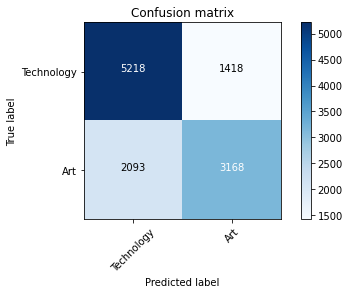

In [ ]:
classifier=model
#pipe.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Technology', 'Art'])

In [ ]:
#Predicting new data___
doc_6= pd.read_csv('/content/data/docs/docs_6.txt', sep= '\t', header= None)
doc_7= pd.read_csv('/content/data/docs/docs_7.txt', sep= '\t', header= None)
doc6_topic= pd.read_csv('/content/data/meta_data/docs_6.csv')
doc7_topic= pd.read_csv('/content/data/meta_data/docs_7.csv')
doc6_topic=doc6_topic.drop(['gender','age','sign', 'date'], axis=1)
doc7_topic=doc7_topic.drop(['gender','age','sign', 'date'], axis=1)
text_new_set=pd.concat([doc_6,doc_7])
text_new_set.rename( columns={0 :'Id',1: 'text'}, inplace=True )
text_new_set.drop(index=text_new_set.index[0], axis=0, inplace=True)

In [ ]:
topic_new_set=pd.concat([doc6_topic,doc7_topic])
topic_new_set.rename( columns={'Unnamed: 0':'Id'}, inplace=True )

In [ ]:
df_new=pd.merge(text_new_set, topic_new_set, on='Id')
df_new['topic'] = df_new.topic.map({'Arts':1, 'Technology':0})

In [ ]:
df_NonEng_detect_pred = df_new.text.apply(lambda x: isEnglish(x))
df_eng = df_new[df_NonEng_detect_pred] # reduced from 11979 rows × 2 columns to 11366 rows × 2 columns
df_eng

,Id,text,topic
0,62525.0,"Well, Anne and I are talking agai...",0
2,62527.0,"OK, Monday. No big deal, after t...",0
3,62528.0,I am at the office today. My pri...,0
4,62529.0,That basically sums it up at the ...,0
13,62538.0,This is the new blog location for...,0
...,...,...,...
11974,74499.0,Ah Wednesday that wonderful day of the ...,0
11975,74500.0,I had heard rumor that Google might be ...,0
11976,74501.0,The non-LDS make fun of the trademark U...,1
11977,74502.0,Who among us having served in the R.S. ...,1


In [ ]:
messages_pred= df_eng.copy()
messages_pred.reset_index(inplace=True)

In [ ]:
corpus_pred=[]
for i in range(0, len(messages_pred)):
  text = re.sub(r'[^a-zA-Z]',' ',messages['text'][i]) #go to each lines and substitute all the character except with lowercase a to z except by whitespace
  text = text.lower()
  text = [get_lemma.lemmatize(token) for token in text.split(" ")]
  text = [get_lemma.lemmatize(token, "v") for token in text]    #verb / noun
  text = [word for word in text if not word in stop_words] # here all the lemma words which are if stopwords like a an then remove else put it
  text = " ".join(text)
  corpus_pred.append(text)

In [ ]:
df_pred = pd.DataFrame (corpus_pred, columns = ['text'])
X_df_pred= df_pred['text']

In [ ]:
X_train.A

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.04904241, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X_df_pred

0                current music   could magic   donna su...
1               hey  one many thing expression zone  ho...
2           much funny     point   mention email  game ...
3           harper  harper  everywhere   harper  harper...
4           earlier post  johnathan say      gregory  d...
                               ...                        
11361       get lot hour work seem   paranoid  yet perh...
11362       holiday weekend wa fun   brother drive enti...
11363       fall back towards earth                    ...
11364       maybe troll around much comment none    sok...
11365       evil  thy name ith procrastination   need p...
Name: text, Length: 11366, dtype: object

In [ ]:
#Spliting to train and test sets by 80 20 ratio___
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df_test,y,test_size= 0.20, random_state=0)

In [ ]:
Vectorizertf_idf= TfidfVectorizer(max_features=4000,ngram_range=(1,3)) #More features the better since it gives the sparse matrix
train_vectors_tf= Vectorizertf_idf.fit_transform(X_train)
X_pred_vectors_tf= Vectorizertf_idf.transform(X_df_pred) #This sometime might give error that TF-IDF is not fitted.. if it did, then it means that the earlier fit we did in the training set got
X_pred_vectors_tf.A

array([[0.        , 0.        , 0.03806684, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.14640474],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X_train=train_vectors_tf
y_pred=X_pred_vectors_tf
model=LogisticRegression()
model.fit(X_train,y_train)
pred_new_logistic=model.predict(y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
df_eng['topic_pred_logistic'] = pred_new_logistic
df_eng
#y_new_true = df_eng['topic']
#df_eng['topic_true'] = y_new_true

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,text,topic,topic_pred_logistic
0,62525.0,"Well, Anne and I are talking agai...",0,1
2,62527.0,"OK, Monday. No big deal, after t...",0,1
3,62528.0,I am at the office today. My pri...,0,1
4,62529.0,That basically sums it up at the ...,0,0
13,62538.0,This is the new blog location for...,0,0
...,...,...,...,...
11974,74499.0,Ah Wednesday that wonderful day of the ...,0,1
11975,74500.0,I had heard rumor that Google might be ...,0,1
11976,74501.0,The non-LDS make fun of the trademark U...,1,0
11977,74502.0,Who among us having served in the R.S. ...,1,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df_eng['topic'],df_eng['topic_pred_logistic']) #0.5439028682034137 accuracy score on new unseen data___ i.e. doc6 and doc 7 merged

0.5439028682034137

In [ ]:
#Using LSTM___
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
voc_size= 90000
onehot_repr=[one_hot(words,voc_size)for words in corpus]
#Embedding Representation
sent_length=200
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [ ]:
## Creating model
embedding_vector_features=100
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(10))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          9000000   
                                                                 
 lstm (LSTM)                 (None, 10)                4440      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 9,004,451
Trainable params: 9,004,451
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final,test_size= 0.20, random_state=42)
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=6,batch_size=64) #accuracy_training: 0.8933; - val_accuracy: 0.7061

Epoch 1/6
744/744 [==============================] - 159s 214ms/step - loss: 0.5875 - accuracy: 0.6768 - val_loss: 0.5397 - val_accuracy: 0.7051
Epoch 2/6
744/744 [==============================] - 155s 208ms/step - loss: 0.4299 - accuracy: 0.7921 - val_loss: 0.5431 - val_accuracy: 0.7113
Epoch 3/6
744/744 [==============================] - 155s 208ms/step - loss: 0.3281 - accuracy: 0.8453 - val_loss: 0.5975 - val_accuracy: 0.7080
Epoch 4/6
744/744 [==============================] - 159s 213ms/step - loss: 0.2632 - accuracy: 0.8744 - val_loss: 0.6925 - val_accuracy: 0.7028
Epoch 5/6
744/744 [==============================] - 154s 207ms/step - loss: 0.2208 - accuracy: 0.8914 - val_loss: 0.7561 - val_accuracy: 0.6960
Epoch 6/6
744/744 [==============================] - 154s 207ms/step - loss: 0.1882 - accuracy: 0.9058 - val_loss: 0.8623 - val_accuracy: 0.6967


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred =(model.predict(X_test) > 0.5).astype("int32")
confusion_matrix(y_test,y_pred)

array([[5080, 1633],
       [1975, 3209]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6967302681348239

In [ ]:
onehot_repr_pred=[one_hot(words,voc_size)for words in corpus_pred]
sent_length=200
embedded_docs_pred=pad_sequences(onehot_repr_pred,padding='pre',maxlen=sent_length)
embedded_docs_pred.shape

(11366, 200)

In [ ]:
pred_new=model.predict(embedded_docs_pred)

In [ ]:
df_eng['topic_pred_prob'] = pred_new
df_eng['topic_pred'] = [1 if y > 0.5 else 0 for y in pred_new]
y_new_true = df_eng['topic']
df_eng['topic_true'] = y_new_true
df_eng

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Id,text,topic,topic_pred_logistic,topic_pred_prob,topic_pred,topic_true
0,62525.0,"Well, Anne and I are talking agai...",0,1,0.994556,1,0
2,62527.0,"OK, Monday. No big deal, after t...",0,1,0.997754,1,0
3,62528.0,I am at the office today. My pri...,0,1,0.497662,0,0
4,62529.0,That basically sums it up at the ...,0,0,0.353546,0,0
13,62538.0,This is the new blog location for...,0,0,0.960261,1,0
...,...,...,...,...,...,...,...
11974,74499.0,Ah Wednesday that wonderful day of the ...,0,1,0.998482,1,0
11975,74500.0,I had heard rumor that Google might be ...,0,1,0.998572,1,0
11976,74501.0,The non-LDS make fun of the trademark U...,1,0,0.724120,1,1
11977,74502.0,Who among us having served in the R.S. ...,1,0,0.998347,1,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df_eng['topic'],df_eng['topic_pred']) #0.5516452577863804

0.5516452577863804